# **Ejercicios Regresión**

Partiendo el conjunto de datos del fichero `data/baseball-data.txt`, calcular lo siguiente:
* Determinar la relación entre las variables `peso` (`weight`) y `altura` (`height`), en unidades del sistema métrico internacional (kilogramos y metros, respectivamente).
* Dibujar diagrama de dispersión de ambas variables.
* Obtener modelo lineal y añadir a la gráfica la recta que define el modelo.
* Predecir la altura de un jugador que pese 100kg.
* Predecir el peso de un jugador de 1.9 metros de altura.

                   Index  Height(Inches)  Weight(Pounds)  Height(M)  \
Index           1.000000        0.009626       -0.007257   0.009626   
Height(Inches)  0.009626        1.000000        0.502859   1.000000   
Weight(Pounds) -0.007257        0.502859        1.000000   0.502859   
Height(M)       0.009626        1.000000        0.502859   1.000000   
Weight(Kg)     -0.007257        0.502859        1.000000   0.502859   

                Weight(Kg)  
Index            -0.007257  
Height(Inches)    0.502859  
Weight(Pounds)    1.000000  
Height(M)         0.502859  
Weight(Kg)        1.000000  


<AxesSubplot:>

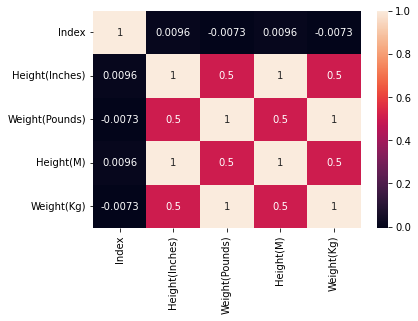

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

df = pd.read_csv('data/baseball-data.txt', sep='\t', skiprows=2, header=0)

df['Height(M)']  = df['Height(Inches)'] * 0.0254
df['Weight(Kg)'] = df['Weight(Pounds)'] * 0.453592

print(df.corr())
sns.heatmap(df.corr(), annot=True)

<AxesSubplot:xlabel='Weight(Kg)', ylabel='Height(M)'>

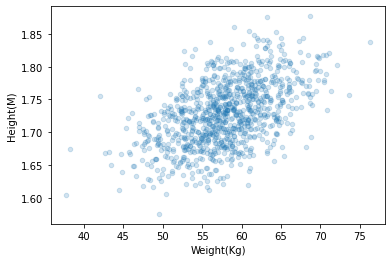

In [2]:
df[:1000].plot(kind='scatter', x='Weight(Kg)', y='Height(M)', alpha=0.2)

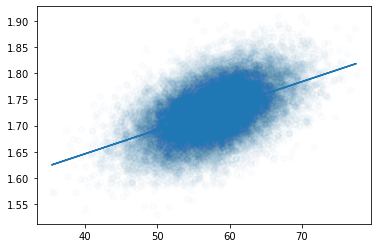

In [3]:
from scipy import stats
import matplotlib.pyplot as plt

slope, intercept, r, p, std_err = stats.linregress(df['Weight(Kg)'], df['Height(M)'])

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, df['Weight(Kg)']))

plt.scatter(df['Weight(Kg)'], df['Height(M)'], alpha=0.02)
plt.plot(df['Weight(Kg)'], mymodel)
plt.show() 


In [4]:
# Predecimos altura de jugador de 100Kg
print(myfunc(100))
# Calculamos el peso de un jugador de 1.90 m de altura
print( (1.9 - intercept) / slope )

1.9215398746136143
95.30944914376772


In [6]:
# Método 2
import statsmodels.formula.api as smf

m_df = df[['Weight(Kg)', 'Height(M)']].copy()
m_df.columns = ["w", "h"]
print(m_df.columns)
results = smf.ols('h ~ w ', data=m_df).fit()

print(results.params)
# Predecimos altura de jugador de 100Kg
print(results.params['w'] * 100 + results.params['Intercept'])
# Calculamos el peso de un jugador de 1.90 m de altura
print( (1.9 - results.params['Intercept']) / results.params['w'] )

Index(['w', 'h'], dtype='object')
Intercept    1.462321
w            0.004592
dtype: float64
1.9215398746136145
95.30944914376768


## **Ejercicio 2 - Calcular regresión polinómica**

## **Ejercicio 3 - Calcular regresión multivariable para BMI (IMC)**

Weight = 51.252494
Height = 1.670896
BMI = 18.357609
¿Predicción?

In [23]:
from sklearn import linear_model

# Calculamos en una nueva columna el BMI
m_df['bmi'] = m_df['w'] / m_df['h'] ** 2

X = m_df[['w', 'h']]
y = m_df['bmi']

regr = linear_model.LinearRegression()
regr.fit(X.values, y.values)

# Predecimos el BMI para un peso de 100 kg y una altura de 1.95 metros
predicted_bmi = regr.predict([[100, 1.95]])

print(predicted_bmi[0]) 

28.569356979436222


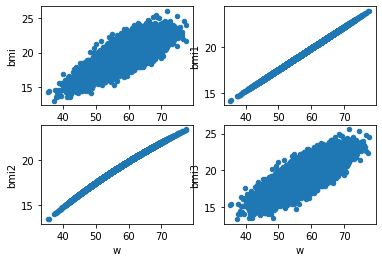

In [21]:
# Calculamos las columnas BMI1, BMI2 y BMI3

# BMI1 = Peso y regresión lineal
slope, intercept, r, p, std_err = stats.linregress(m_df['w'], m_df['bmi'])

def bmi_model_linear(x):
  return slope * x + intercept

m_df['bmi1'] = m_df['w'].apply(bmi_model_linear)
# Método 2 
# m_df['bmi1'] = bmi_model_linear(m_df['w'])

# BMI2 = Peso y regresión polinómica
bmi_model_poly = np.poly1d(np.polyfit(m_df['w'], m_df['bmi'], 3))
m_df['bmi2'] = m_df['w'].apply(lambda i: bmi_model_poly(i))
# Método 2
# m_df['bmi2'] = bmi_model_poly(m_df['w'])

# BMI3 = Peso y multivariable (peso y alturas)
m_df['bmi3'] = m_df.apply(lambda x: regr.predict([[x.w, x.h]])[0], axis=1)
# MÉTODO 2
# m_df['bmi3'] = regr.predict(m_df[['w', 'h']])

import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 2)
m_df.plot(kind="scatter", x="w", y="bmi",  ax=axes[0,0])
m_df.plot(kind="scatter", x="w", y="bmi1", ax=axes[0,1])
m_df.plot(kind="scatter", x="w", y="bmi2", ax=axes[1,0])
m_df.plot(kind="scatter", x="w", y="bmi3", ax=axes[1,1])

plt.show()

## **Ejercicio 6 - Train / Test**

In [38]:
from sklearn.metrics import r2_score

# Generamos los conjuntos de train y test
train_size = round(m_df.shape[0] * 0.8)
test_size = m_df.shape[0] - train_size
print(m_df.shape[0], train_size, test_size)

X_train = m_df[['w', 'bmi']].iloc[:train_size]
X_test = m_df[['w', 'bmi']].iloc[test_size:].reset_index()

# Generamos el modelo para el conjunto de entrenamiento
height_model = np.poly1d(np.polyfit(X_train['w'], X_train['bmi'], 3))

print(r2_score(X_train['bmi'], height_model(X_train['w']))) 

# Generamos el modelo para el conjunto de testing
height_model = np.poly1d(np.polyfist(X_test['w'], X_test['bmi'], 3))

print(r2_score(X_test['bmi'], height_model(X_test['w'])))


25000 20000 5000
0.6336376763597872
0.6390270384479764
